r = 4, Average MSE over 5 trials: 4.123122e-04
r = 8, Average MSE over 5 trials: 3.444701e-04
r = 16, Average MSE over 5 trials: 3.448703e-04
r = 32, Average MSE over 5 trials: 3.450090e-04
r = 64, Average MSE over 5 trials: 3.450296e-04
r = 128, Average MSE over 5 trials: 3.450312e-04
r = 256, Average MSE over 5 trials: 3.450315e-04
r = 512, Average MSE over 5 trials: 3.450315e-04


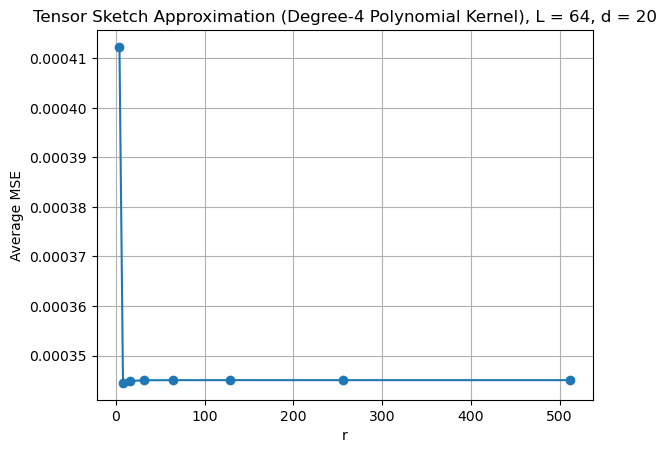

r = 4, Average MSE over 5 trials: 1.363614e-04
r = 8, Average MSE over 5 trials: 9.731282e-05
r = 16, Average MSE over 5 trials: 9.723273e-05
r = 32, Average MSE over 5 trials: 9.725941e-05
r = 64, Average MSE over 5 trials: 9.726761e-05
r = 128, Average MSE over 5 trials: 9.726819e-05
r = 256, Average MSE over 5 trials: 9.726827e-05
r = 512, Average MSE over 5 trials: 9.726829e-05


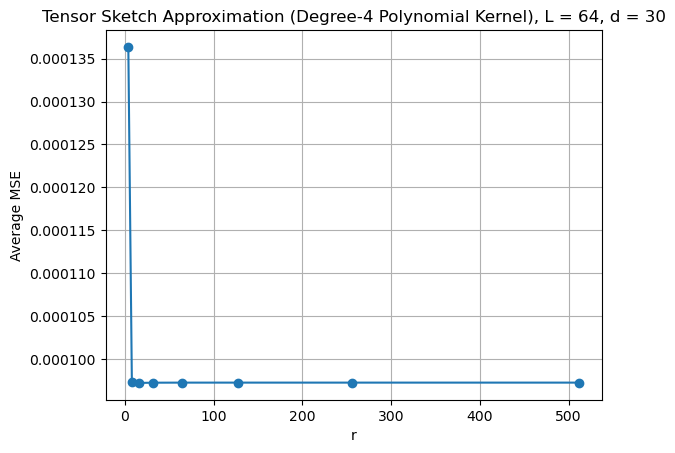

r = 4, Average MSE over 5 trials: 7.933472e-05
r = 8, Average MSE over 5 trials: 3.845496e-05
r = 16, Average MSE over 5 trials: 3.814984e-05
r = 32, Average MSE over 5 trials: 3.817490e-05
r = 64, Average MSE over 5 trials: 3.817771e-05
r = 128, Average MSE over 5 trials: 3.817802e-05
r = 256, Average MSE over 5 trials: 3.817804e-05
r = 512, Average MSE over 5 trials: 3.817805e-05


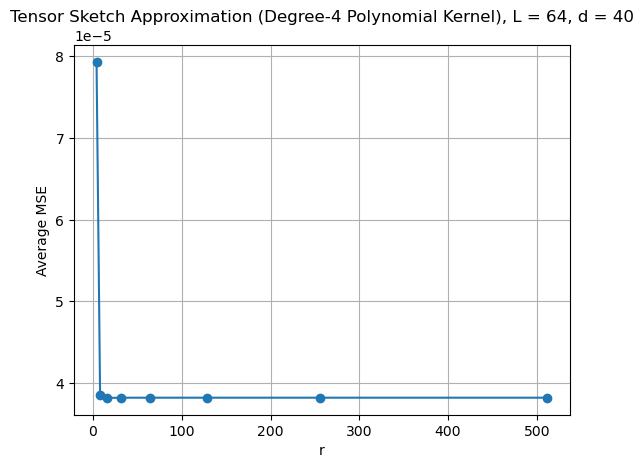

r = 4, Average MSE over 5 trials: 6.807860e-05
r = 8, Average MSE over 5 trials: 1.423644e-05
r = 16, Average MSE over 5 trials: 1.385786e-05
r = 32, Average MSE over 5 trials: 1.386891e-05
r = 64, Average MSE over 5 trials: 1.386996e-05
r = 128, Average MSE over 5 trials: 1.387011e-05
r = 256, Average MSE over 5 trials: 1.387012e-05
r = 512, Average MSE over 5 trials: 1.387012e-05


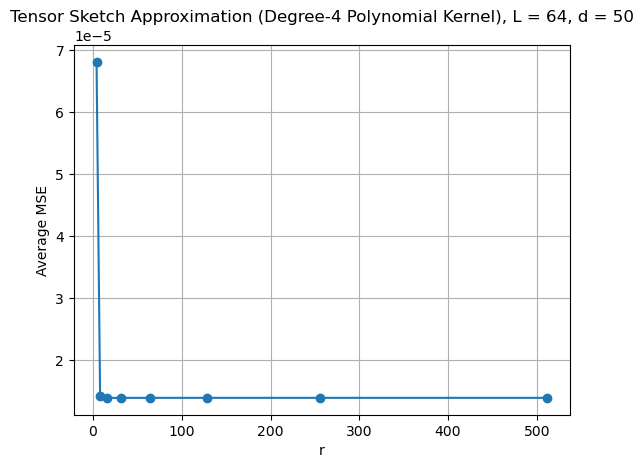

r = 4, Average MSE over 5 trials: 7.570370e-05
r = 8, Average MSE over 5 trials: 1.073076e-05
r = 16, Average MSE over 5 trials: 1.046505e-05
r = 32, Average MSE over 5 trials: 1.046240e-05
r = 64, Average MSE over 5 trials: 1.046314e-05
r = 128, Average MSE over 5 trials: 1.046315e-05
r = 256, Average MSE over 5 trials: 1.046316e-05
r = 512, Average MSE over 5 trials: 1.046316e-05


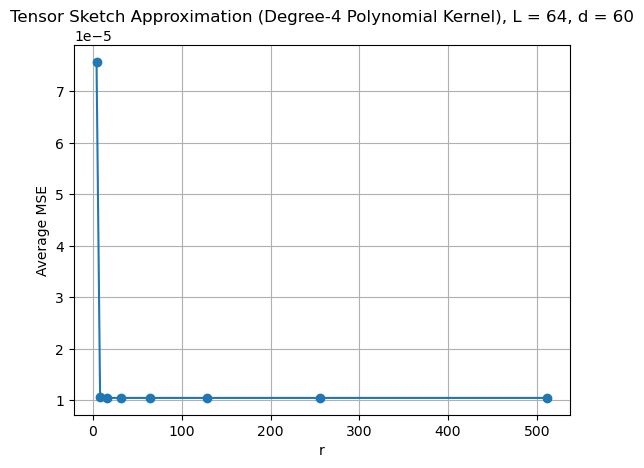

In [50]:
# Best Version 
import torch
import numpy as np
import matplotlib.pyplot as plt

def generate_hashes(d, r, degree):
    h = [torch.randint(0, r, (d,)) for _ in range(degree)]
    s = [torch.randint(0, 2, (d,)) * 2 - 1 for _ in range(degree)]
    return h, s

def tensor_sketch(x, h, s, r):
    degree = len(h)
    L, d = x.shape
    sketches = torch.ones((L, r), dtype=torch.cfloat)

    for i in range(degree):
        x_sign = x * s[i]
        proj = torch.zeros((L, r), dtype=torch.cfloat)
        for j in range(d):
            proj[:, h[i][j]] += x_sign[:, j]
        sketches *= torch.fft.fft(proj,norm="ortho")
    return torch.fft.ifft(sketches,norm="ortho").real 

def compute_exact_attention(Q, K):
    return (Q @ K.T) ** 4

def run_experiment(L, d, degree=4, r_values=[4,8,16,32,64,128, 256, 512], num_trials=5):
    Q = torch.randn(L, d)
    K = torch.randn(L, d)
    Q = torch.nn.functional.normalize(Q, dim=1)
    K = torch.nn.functional.normalize(K, dim=1)

    A_exact = compute_exact_attention(Q, K)
    results = []

    for r in r_values:
        mse_total = 0.0
        for _ in range(num_trials):
            h, s = generate_hashes(d, r, degree)
            phi_Q = tensor_sketch(Q, h, s, r)
            phi_K = tensor_sketch(K, h, s, r)
            A_approx = phi_Q @ phi_K.T
            mse = torch.mean((A_exact - A_approx) ** 2).item()
            mse_total += mse
        mse_avg = mse_total / num_trials
        print(f"r = {r}, Average MSE over {num_trials} trials: {mse_avg:.6e}")
        results.append((r, mse_avg))

    # Plot
    x, y = zip(*results)
    plt.plot(x, y, marker='o')
    plt.xlabel("r")
    plt.ylabel("Average MSE")
    plt.title(f"Tensor Sketch Approximation (Degree-4 Polynomial Kernel), L = {L}, d = {d}")
    plt.grid(True)
    plt.show()

run_experiment(64,20)
run_experiment(64,30)
run_experiment(64,40)
run_experiment(64,50)
run_experiment(64,60)


In [40]:
def generate_clustered_data(L, d, num_clusters=4, cluster_std=0.2):
    assert L % num_clusters == 0, "L must be divisible by number of clusters"
    samples_per_cluster = L // num_clusters

    data = []
    for _ in range(num_clusters):
        # Random cluster center
        center = torch.randn(d)
        # Samples around the center
        cluster_points = center + cluster_std * torch.randn(samples_per_cluster, d)
        data.append(cluster_points)

    X = torch.cat(data, dim=0)
    return torch.nn.functional.normalize(X, dim=1)  # normalize rows to unit vectors


r = 4, Average MSE over 5 trials: 3.845451e-04
r = 8, Average MSE over 5 trials: 3.257483e-04
r = 16, Average MSE over 5 trials: 3.245805e-04
r = 32, Average MSE over 5 trials: 3.246061e-04
r = 64, Average MSE over 5 trials: 3.246231e-04
r = 128, Average MSE over 5 trials: 3.246233e-04
r = 256, Average MSE over 5 trials: 3.246232e-04
r = 512, Average MSE over 5 trials: 3.246232e-04


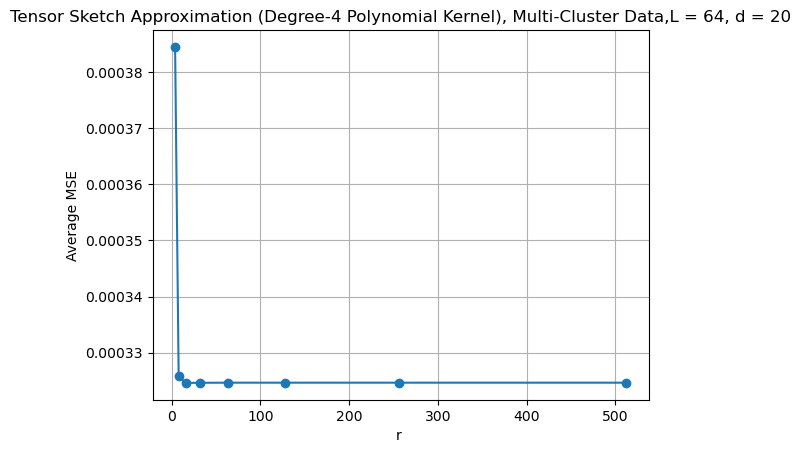

r = 4, Average MSE over 5 trials: 1.366264e-04
r = 8, Average MSE over 5 trials: 8.282395e-05
r = 16, Average MSE over 5 trials: 8.302760e-05
r = 32, Average MSE over 5 trials: 8.293261e-05
r = 64, Average MSE over 5 trials: 8.293435e-05
r = 128, Average MSE over 5 trials: 8.293458e-05
r = 256, Average MSE over 5 trials: 8.293464e-05
r = 512, Average MSE over 5 trials: 8.293464e-05


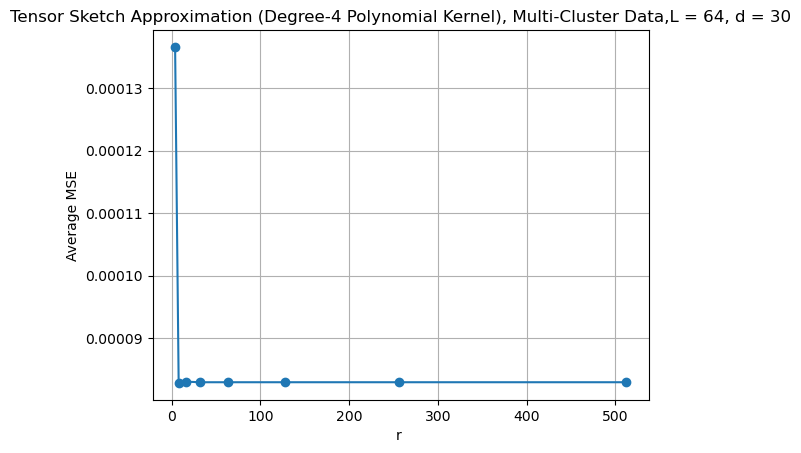

r = 4, Average MSE over 5 trials: 3.201483e-05
r = 8, Average MSE over 5 trials: 8.875955e-06
r = 16, Average MSE over 5 trials: 8.465680e-06
r = 32, Average MSE over 5 trials: 8.598098e-06
r = 64, Average MSE over 5 trials: 8.597148e-06
r = 128, Average MSE over 5 trials: 8.597129e-06
r = 256, Average MSE over 5 trials: 8.597175e-06
r = 512, Average MSE over 5 trials: 8.597173e-06


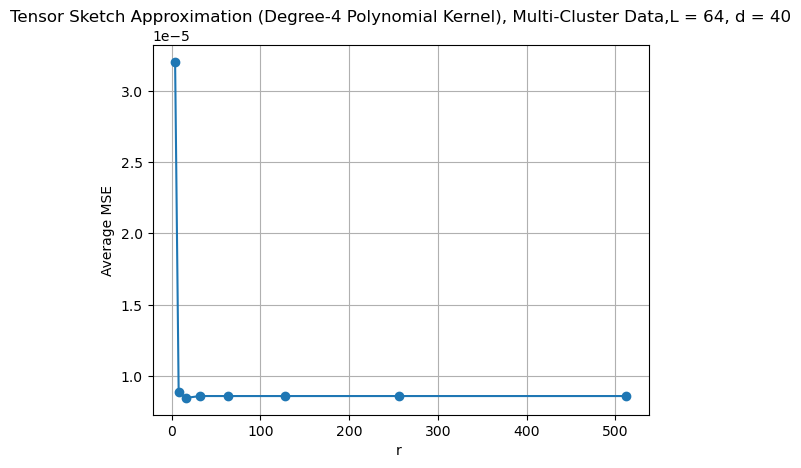

r = 4, Average MSE over 5 trials: 3.615683e-05
r = 8, Average MSE over 5 trials: 3.335479e-06
r = 16, Average MSE over 5 trials: 3.623958e-06
r = 32, Average MSE over 5 trials: 3.658489e-06
r = 64, Average MSE over 5 trials: 3.658805e-06
r = 128, Average MSE over 5 trials: 3.658993e-06
r = 256, Average MSE over 5 trials: 3.658988e-06
r = 512, Average MSE over 5 trials: 3.658989e-06


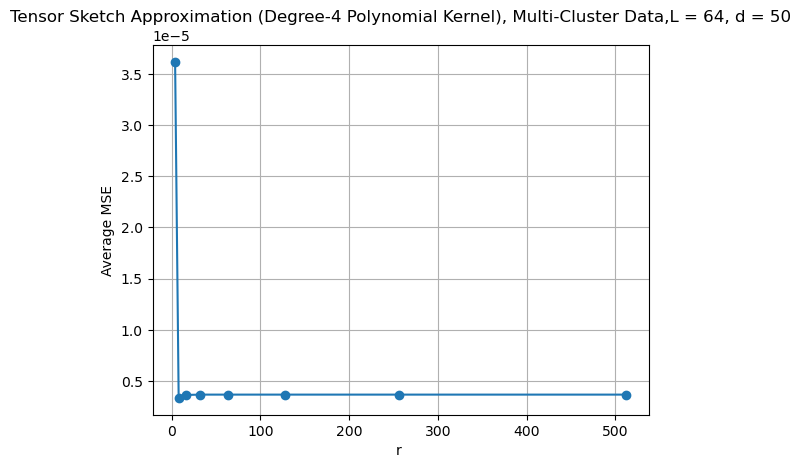

r = 4, Average MSE over 5 trials: 1.620177e-05
r = 8, Average MSE over 5 trials: 1.838058e-06
r = 16, Average MSE over 5 trials: 1.557841e-06
r = 32, Average MSE over 5 trials: 1.546037e-06
r = 64, Average MSE over 5 trials: 1.546387e-06
r = 128, Average MSE over 5 trials: 1.546408e-06
r = 256, Average MSE over 5 trials: 1.546409e-06
r = 512, Average MSE over 5 trials: 1.546409e-06


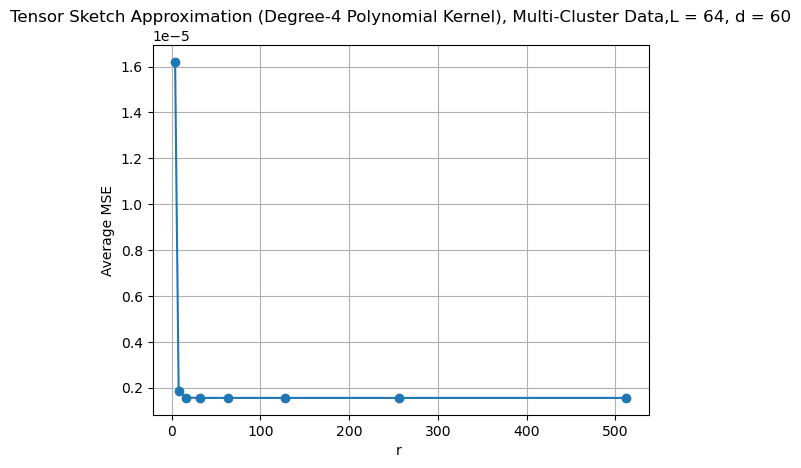

In [52]:
#Cluster Data Set 
def run_experiment_alpha(L, d, degree=4, r_values=[4,8,16,32,64,128, 256, 512], num_trials=5):
    Q = generate_clustered_data(L, d, num_clusters=4, cluster_std=0.2)
    K = generate_clustered_data(L, d, num_clusters=4, cluster_std=0.2)


    A_exact = compute_exact_attention(Q, K)
    results = []

    for r in r_values:
        mse_total = 0.0
        for _ in range(num_trials):
            h, s = generate_hashes(d, r, degree)
            phi_Q = tensor_sketch(Q, h, s, r)
            phi_K = tensor_sketch(K, h, s, r)
            A_approx = phi_Q @ phi_K.T
            mse = torch.mean((A_exact - A_approx) ** 2).item()
            mse_total += mse
        mse_avg = mse_total / num_trials
        print(f"r = {r}, Average MSE over {num_trials} trials: {mse_avg:.6e}")
        results.append((r, mse_avg))

    # Plot
    x, y = zip(*results)
    plt.plot(x, y, marker='o')
    plt.xlabel("r ")
    plt.ylabel("Average MSE")
    plt.title(f"Tensor Sketch Approximation (Degree-4 Polynomial Kernel), Multi-Cluster Data,L = {L}, d = {d}")
    plt.grid(True)
    plt.show()

run_experiment_alpha(64,20)
run_experiment_alpha(64,30)
run_experiment_alpha(64,40)
run_experiment_alpha(64,50)
run_experiment_alpha(64,60)